In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/aqf/data/delhi.csv', parse_dates=True)
df.set_index('date')
df.head()

,date,PM25
0,2014-12-10,231.0
1,2014-12-11,201.0
2,2014-12-12,237.0
3,2014-12-13,295.0
4,2014-12-14,185.0


In [2]:
from utility import sequence_to_table
from numpy import mean

seq_mean = mean(df.PM25.values)

sequence = df.PM25.values - seq_mean
data = sequence_to_table(sequence, look_back=30)

# divide data into feature and target
X = data.drop(columns=['next']).values
y = data.next.values

# first reshape the data
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

Looking at output of LSTM
--------------

In [3]:
import tensorflow as tf
from keras.models import Sequential
tf.random.set_seed(42)

model = Sequential()

model.add(tf.keras.layers.LSTM(units=64, 
                              activation='relu', 
                              input_shape=(1, X_reshaped.shape[2])))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mse', optimizer='adam')

In [ ]:
import tensorflow as tf
from keras.models import Sequential
tf.random.set_seed(42)

lstm_1 = tf.keras.layers.LSTM(units=10, 
                              activation='relu', 
                              input_shape=(1, X_reshaped.shape[2]))(X_reshaped[:10])

dense_1 = tf.keras.layers.Dense(4)(lstm_1)
dense_2 = tf.keras.layers.Dense(15)(lstm_1)

output = tf.keras.layers.Dense(1, activation='relu')(dense_1)

print(output)

tf.Tensor(
[[159.90564]
 [148.44066]
 [179.57925]
 [175.10216]
 [262.6014 ]
 [178.30595]
 [182.33006]
 [203.67593]
 [231.62   ]
 [262.68774]], shape=(10, 1), dtype=float32)


In [4]:
history = model.fit(X_reshaped, y, epochs=100, batch_size=32)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 3132.2000
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 1991.9510
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 1671.7256
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 1493.7626
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 1393.2152
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 1283.1494
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 1205.8933
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 1160.2557
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 1143.8317
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 1086.2098
Epoch 11/100
83/83 [==============================] - 0s 2ms/step - loss: 1082.7286
Epoch 12/100
83/83 [==============================] - 0s 2ms/step - loss: 1051.1676
E

In [5]:
forecast = model.predict(X_reshaped)

In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

sqrt(mean_squared_error(y, forecast))

20.09440163696277

In [7]:
forecasted = forecast + seq_mean
original = y + seq_mean

print(sqrt(mean_squared_error(y, forecast)))

20.09440163696277


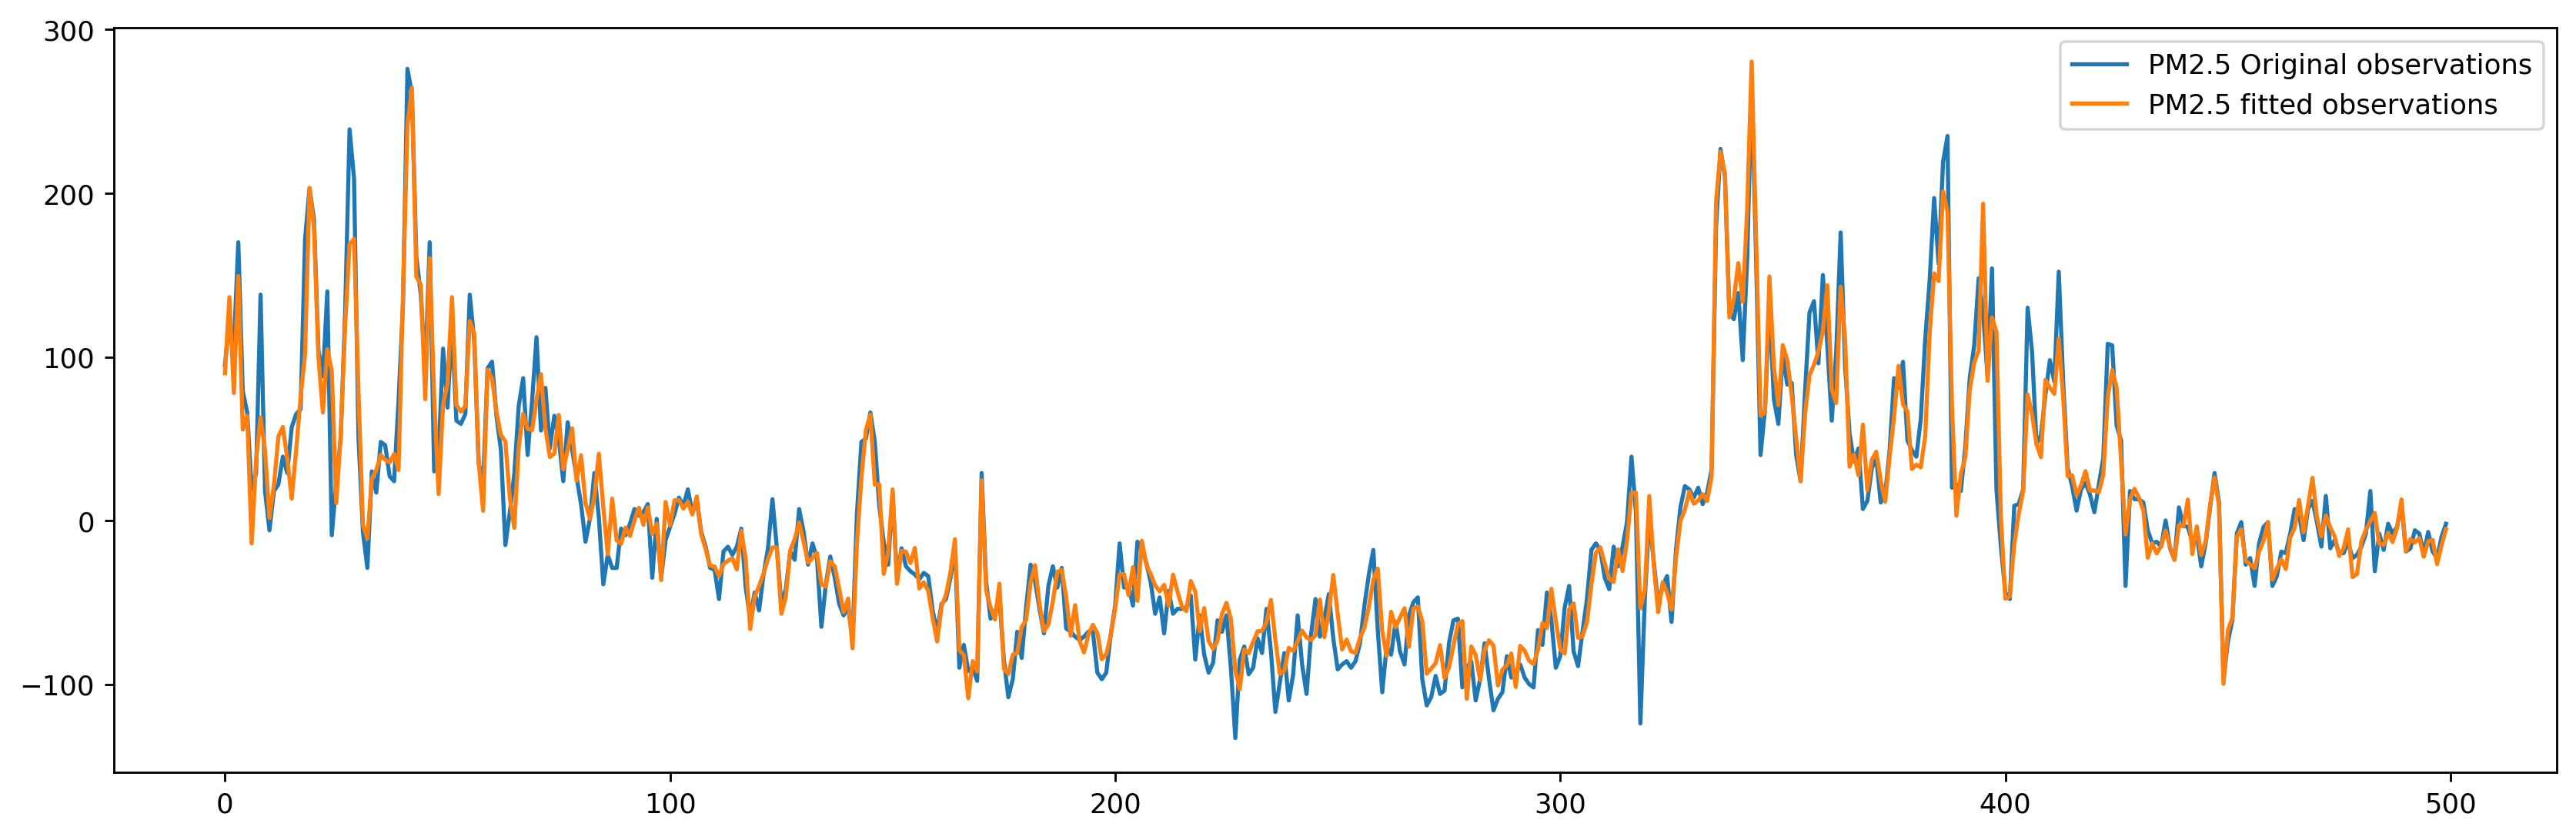

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5)).set_dpi(256)
plt.plot(y[-500:], label='PM2.5 Original observations')
plt.plot(forecast[-500:], label='PM2.5 fitted observations')
plt.legend()
plt.show()

In [9]:
input = X_reshaped[-1]
print(input.shape)

(1, 30)


In [10]:
import numpy as np

predictions = []

for i in range(50):
  input = input.reshape(1, 1, 30)
  predict = model.predict(input)
  input = input.ravel()
  predictions.append(round(predict[0][0] + seq_mean, 2))
  input = np.delete(input, 0)
  input = np.append(input, predict[0][0])

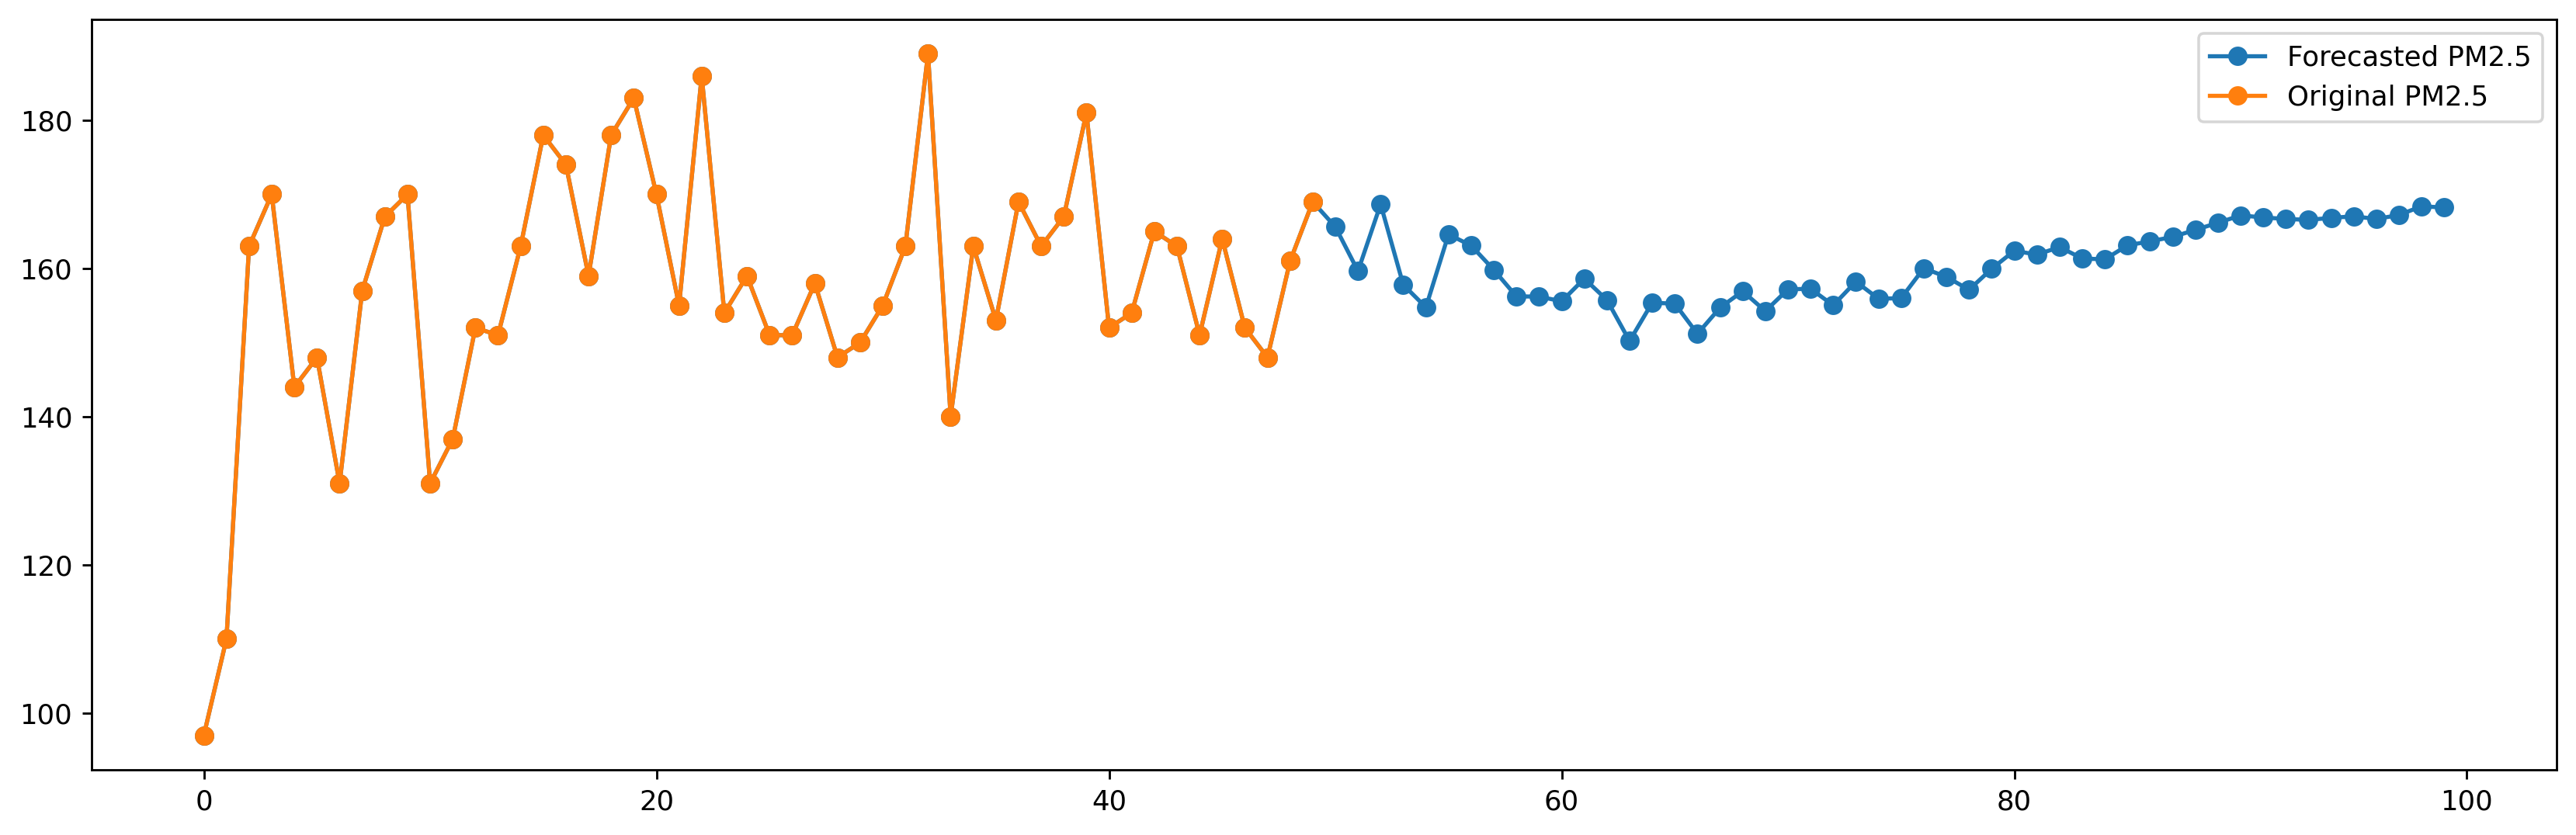

In [11]:
plt.figure(figsize=(16, 5)).set_dpi(256)
plt.plot(np.append(y[-50:] + seq_mean, predictions), label='Forecasted PM2.5', marker='o')
plt.plot(y[-50:] + seq_mean, label='Original PM2.5', marker='o')
plt.legend()
plt.show()

End of file